
# AGEC 3333 Agricultural Marketing and Price Analysis - Lecture


<CENTER><H2>Rodney Beard</H2></CENTER>



![title](Picture1.png)

## Objective

Explain how  the set of prices is connected over space?

<table>
<CAPTION ALIGN="TOP">Ocean freight rates for grain</CAPTION>
<tr>
    <td></td><td colspan="5">UD dollars per tonne</td></tr>
  <tr>
    <td>From/To</td>
    <td>Algeria</td>
    <td>Egypt </td>
    <td>Iran</td>
    <td>Korea</td>
    <td>Morocco</td>
    
    </tr>
    <tr>
    <td> Australia </td><td> na </td><td> 32 </td><td> 29</td><td> 19</td><td>na</td>
    </tr>
    <tr>
    <td> EU </td><td> 24 </td><td> 26</td><td> na</td><td> na</td><td>22</td>
    </tr>
    <tr>
    <td> US Gulf</td><td> na</td><td> 35</td><td> na </td><td> 45 </td> <td>32</td>
    </tr>
  </tr>
  </table>

In [59]:
import networkx as nx
import matplotlib.pyplot as plt

[]

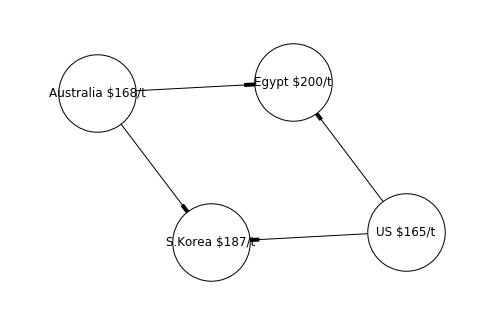

In [60]:
G=nx.DiGraph()
 # positions for all nodes
pos = nx.spring_layout(G)
# nodes

G.add_node('Egypt $200/t')
G.add_node('Australia $168/t')
G.add_node('S.Korea $187/t')
G.add_node('US $165/t')

#G['Egypt $200/t']['Australia $168/t']['weight'] = 32

G.add_edges_from([('Australia $168/t','Egypt $200/t'),('Australia $168/t','S.Korea $187/t'),
                  ('US $165/t','S.Korea $187/t'),('US $165/t','Egypt $200/t')])


nx.draw(G,node_size=6000,node_color='w',with_labels=True,arrows=True)
plt.plot()

![title](Picture2.png)

We will review some necessary mathematics for understanding non-linear programming.  The topics covered will include:

1. unconstrained optimization
2. optimization with equality constraints
3. linear optimization with inequality and posssibly also equality constraints (linear programming)
4. non-linear optimization with inequality and posssibly also equality constraints (non-linear programming)

## Unconstrained optimization
This includes both maximization and minimization. To convert a maximization to a minimization function and vice versa  multiply the function to be maximized or minimized by -1. Let's consider the problem of a monopolist as this is closest in structure to the net aggregate welfare maximization problem that we are interested in.



Profit = Revenue - Costs:

$\Pi= p(Q) Q - C(Q)$

we will assume linear demand $p(Q) = a - b Q$ and linear constant marginal costs $C(Q)=cQ$ then our profit function becomes quadratic (verify this for yourself!).


We will use the Python module SymPy to analyze this problem. First we need to import SymPy:

In [61]:
%matplotlib inline
from sympy import * #enable sympy for symbolic mathematics
from sympy import symbols # probably don't need to do this this imports symbols
import numpy as np # we will use this to create a graph
import matplotlib.pyplot as plt #

Then we need to define which variables are symbolic:

In [62]:
a = 50
b = 0.5
c = 2

Q = np.linspace(0,100,10) 
# This creates a Q-axis (X-axis) starting at 0 
# and going to 100 in increment of 10.



Then we need to define profit:

In [63]:
profit = (a - b*Q)*Q - c*Q
    

Let's plot this to see what it looks like.

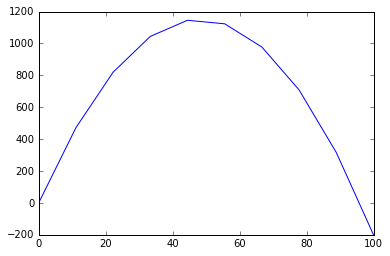

In [64]:
plt.plot(Q,profit)

Where does this curve have a maximum?

So we need to differentiate profit symbolically. To do this we introduce symbols and define profit in terms of symblic expressions. We are going to SymPy's symbolic algebra abilities in what follows

In [65]:
Q, a, b, c = symbols('Q a b c')
profit = (a - b*Q)*Q - c*Q

Then we need to differentiate this with respect to Q

In [66]:
foc = diff(profit,Q) # foc stands for "first order condition"
foc #Let's see the result

-2*Q*b + a - c

Now let us solve for Q by setting the first-order condition equal to 0 and rearranging to get Q.

In [67]:
solve(foc,Q)


[(a - c)/(2*b)]

We should also check the second order conditions:

In [68]:
soc = diff(profit,Q,Q)
soc

-2*b

We can see that as long as $b > 0$ that the second  order condition for a maximum is satisfied.

What we did was take a smooth function and differentiate it to find the slope, then setting that equal to zero. 

## Optimization with equality constraints

To maximize or minimize a function subject to equality constraints we introduce what is called a Lagrangian.

Our problem is to maximize for example utility $U(x,y)$ subject to a budget constraint $ p_x x + p_y y = M$



To do this we construct the Lagrangian function 

$L(x,y,\lambda) = U(x,y) +\lambda [M - p_x x - p_y y]$ 

Then differentiate with respect to $x,y,\lambda$

$\frac{\partial L}{\partial x} = \frac{\partial U}{\partial x} -\lambda p_x = 0$

$\frac{\partial L}{\partial y} = \frac{\partial U}{\partial y} -\lambda p_y = 0$

$\frac{\partial L}{\partial \lambda} =M - p_x x - p_y y= 0$

Then eliminate the Lagrange multiplier $\lambda$

$\frac{\frac{\partial U}{\partial x}}{\frac{\partial U}{\partial y}} = \frac{p_x}{p_y}$

which leaves two equations to solve for $x$ and $y$ (the one above) and

$M - p_x x- p_y y = 0$



### Example

$U =x y$

$L(x,y,\lambda) = x y +\lambda [M - p_x x - p_y y]$ 

Now we solve this using SymPy

In [69]:
x, y, l, M, px, py = symbols('x y l M px py')
Lagr = x*y +l*(M - px*x - py*y)
foc1 = diff(Lagr,x)
foc2 = diff(Lagr,y)
foc3 = diff(Lagr,l)
solve([foc1,foc2,foc3],[x,y,l])

{y: M/(2*py), x: M/(2*px), l: M/(2*px*py)}

## Linear programming

This is just a brief introduction to linear programming. We will do more in the farm and agribusiness management class.

Consider the following problem:

$\max 3 x_1 + 2 x_2$

subject to 

$2 \hspace{0.1cm} x_1 + 3\hspace{0.1cm} x_2 \leq 100 $

$ x_1 + x_2 \leq 80 $

$ x_1 \leq 40 $

$ x_1 \geq 0 $

$ x_2 \geq 0 $

This is solved using Pulp below.

In [70]:
import pulp
from pulp import *
# pulp.pulpTestAll() 
# This just tests that it installed and imported correctly

In [71]:
# declare your variables
x1 = LpVariable("x1", 0, 40)   # 0<= x1 <= 40
x2 = LpVariable("x2", 0, 1000) # 0<= x2 <= 1000
 
# defines the problem
prob = LpProblem("problem", LpMaximize)
 
# defines the constraints
prob += 2*x1+3*x2 <= 100 
prob += x1+x2 <= 80
prob += x1<=40
prob += x1>=0
prob += x2>=0
 
# defines the objective function to maximize
prob += 3*x1+2*x2
 
# solve the problem
status = prob.solve()
LpStatus[status]
 
# print the results x1 = 20, x2 = 60
sol1 = value(x1)
sol2 = value(x2)
print(sol1)
print(sol2)

40.0
6.6666667


## Transportation problem

$ \min \sum_i \sum_j c_{ij} x_{ij} $

subject to

$ \sum_i x_{ij} = D_j,  \hspace{0.1cm} \forall j$ Demands

$\sum_j x_{ij} = S_i,  \hspace{0.1cm} \forall i$ Supplies

$ x_{ij} \geq 0 $ 



# Exercise

Using the demand and supply estimates in Table 2.Q p. 33 of the Textbook solve for the equilibrium quantities in each country and then use Pulp to solve a transportation problem.  

## Non-linear programming

With non-linear proggramming we wish to maximimize (minimize) a possibly linear objective with either linear or non-linear constraints.

$\max f(\vec{x})$

st $g(\vec{x}) \leq 0 $

$\mbox{   } h(\vec{x}) =0$



   


In [80]:
import nlopt
from numpy import *

def myfunc(x, grad):
    if grad.size > 0:
        grad[0] = 0.0
        grad[1] = 0.5 / sqrt(x[1])
    return sqrt(x[1])

def myconstraint(x, grad, a, b):
    if grad.size > 0:
        grad[0] = 3 * a * (a*x[0] + b)**2
        grad[1] = -1.0
    return (a*x[0] + b)**3 - x[1]

opt = nlopt.opt(nlopt.LD_MMA, 2)
opt.set_lower_bounds([-float('inf'), 0])
opt.set_min_objective(myfunc)
opt.add_inequality_constraint(lambda x,grad: myconstraint(x,grad,2,0), 1e-8)
opt.add_inequality_constraint(lambda x,grad: myconstraint(x,grad,-1,1), 1e-8)
opt.set_xtol_rel(1e-4)
x = opt.optimize([1.234, 5.678])
minf = opt.last_optimum_value()
print("optimum at", x[0],x[1])
print("value = ", minf)
print("result code = ", opt.last_optimize_result())

#Source: http://jdj.mit.edu/wiki/index.php/NLopt_Tutorial#Example_in_Python.
# verify that the solution obtained is the same as in the Tutorial.

optimum at 0.333333334693 0.296296289403
value =  0.5443310476200902
result code =  4


## Application: Spatial equilibrium pricing


- Assume a linear inverse demand for region i, $P_i = a_i -b_i Q_{i}^D$
- Area under the demand curve  for a given price is the area of the consumerwelfare triangle $\frac{1}{2}(a_i - P_i)Q_i^D $
- Plus the area of the producer revenue $ P_i Q_i^D $
- Simplifying this is $ (a_i - 0.5 b_i Q_i^D)Q_i^D $



## Net Aggregate Welfare

We need to maximize either one of the following

$NAW_V = \sum_{i=1}^{n} (a_i - 0.5 b_i Q_i^D)Q_i^D -\sum_{i=1}^n (\alpha_i + 0.5 \beta_i Q_i^S)Q_i^S - \sum_{i=1}^n \sum_{j=1}^{n}C_{ij}T_{ij}$ with vertical axis intercept

$NAW_H = \sum_{i=1}^{n}(a_i - 0.5 b_iQ_{i}^D)Q_i^D -\sum_{i=1}^{n}0.5(\alpha_i + \beta_iQ_i^S)(Q_i^S +\frac{\alpha_i}{\beta_i}) - \sum_{j=1}^{n} \sum_{j=1}^{n} C_{ij} T_{ij} $ with horizontal axis intercept

subject to 

$\sum_{j=1}^n T_{ji} \geq Q_i^D, \hspace{0.1cm} \forall i$

and

$\sum_{j=1}^n T_{ij} \leq Q_i^S \hspace{0.1cm} \forall i$

and

$T_{ij}, Q_{i}^D, Q_{i}^S \geq 0, \forall i$

## Lagrangian

$ L =\sum_{i=1}^n \left[(a_i - 0.5 b_i Q_i^D) Q_i^D -(\alpha_i + 0.5\beta_iQ_i^S)Q_i^S\right] - \sum_{i=1}^n\sum_{j=1}^n C_{ij} T_{ij} $ 

$+ \sum_{i=1}^n \lambda_i^D (\sum_{j=1}^n T_{ji}-Q_i^D ) + \sum_{i=1}^n \lambda_i^S (Q_i^S - \sum_{j=1}^n T_{ij}) - \sum_{i=1}\sum_{j=1} \lambda_{ij}^T T_{ij}$



## Karush-Kuhn-Tucker conditions (KKT)

$\frac{\partial L}{\partial Q_i^D} = a_i - b_i Q_i^D - \lambda_i^D \leq 0 $

$ \frac{\partial L}{\partial Q_i^D} Q_i^D = 0$ non-negativity condition 

$\lambda_i^D (\sum_{j=1}^n T_{ji} - Q_i^D) = 0$ complementary slackness condition

$\frac{\partial L}{\partial Q_i^S} = -(a_i + b_i Q_i^D) + \lambda_i^S \leq 0 $

$ \frac{\partial L}{\partial Q_i^S} Q_i^S = 0$ non-negativity condition 

$\lambda_i^D (\sum_{j=1}^n T_{ij} - Q_i^S) = 0$ complementary slackness condition

$\frac{\partial L}{\partial T_{ij}} = - C_{ij} + \lambda_j^D - \lambda_i^S - \lambda_{ij}^T\leq 0 $

$ \frac{\partial L}{\partial T_{ij}} T_{ij} = 0$ non-negativity condition 

$\lambda_{ij}^T T_{ij} = 0, j=1,2,\ldots,n$ complementary slackness condition

## Spatial pricing case study

<table>
<CAPTION ALIGN="TOP">Pre-scaled parameters for tomato case study: Supply and demand intercept and slope parameters</CAPTION>
<tr>
  <td colspan="5">(a)</td>
  </tr>
  <tr>  
  <td></td><td colspan="2">Intercept parameters</td><td colspan="2">Slope parameters</td>
  </tr>  
  <tr>
    <td>Region</td>
    <td>Supply ($\alpha$)</td>
    <td>Demand ($a$)</td>
    <td>Supply ($\beta$)</td>
    <td>Demand ($b$)</td>
 
    </tr>
    <tr>
    <td> Mexico </td><td> -2,532 </td><td> 8,732.3 </td><td> 0.00146</td><td> 0.00578</td>
    </tr>
    <tr>
    <td> US </td><td> -1,279 </td><td> 2,217.1</td><td> 0.00021</td><td> 0.00011</td>
    </tr>
    <tr>
    <td> Canada</td><td> -2,128</td><td> 5,131.1</td><td> 0.0059 </td><td> 0.00581 </td> 
    </tr>
    <tr>
    <td>EU</td><td> -5,337</td><td>4,258.7</td><td>0.00043</td><td>0.00022</td>
    </tr>
    <tr>
    <td>L.Amer.</td><td>-3,306</td><td>2,806.5</td><td>0.00059</td><td>0.00036</td>
    </tr>
 
  </table>









<table>
<CAPTION ALIGN="TOP">Pre-scaled parameters for tomato case study: Transportation cost parameters</CAPTION>
<tr>
  <td colspan="6">(b)</td>
  </tr>
  <tr>  
  <td></td><td colspan="5">US Dollars per ton</td>
  </tr>  
  <tr>
    <td>Region</td>
    <td>Mexico($\alpha$)</td>
    <td>US($a$)</td>
    <td>Canada ($\beta$)</td>
    <td>EU($b$)</td>
    <td>L.Amer.</td>
 
    </tr>
    <tr>
    <td> Mexico </td><td> 0.00 </td><td> 58.50 </td><td> 96.63</td><td> 155.55</td><td>161.88</td>
    </tr>
    <tr>
    <td> US </td><td> 58.50 </td><td> 0.00 </td><td> 42.21</td><td> 106.98</td><td>142.05</td>
    </tr>
    <tr>
    <td> Canada</td><td> 96.63</td><td> 42.21</td><td> 0.00 </td><td> 106.47 </td> <td>164.43</td>
    </tr>
    <tr>
    <td>EU</td><td> 155.55</td><td>106.98</td><td>106.47</td><td>0.00</td><td>137.37</td>
    </tr>
    <tr>
    <td>L.Amer.</td><td>161.88</td><td>142.05</td><td>164.43</td><td>137.37</td><td>0.00</td>
    </tr>
 
  </table>

## Free-flow Equilibrium

- Determining the fre-flow equilibrium can be used to find starting values for the NLP

- Find the scaled demands and supplies across all regions

- Then solve for the equilibrium price

- The equilibrium price of the aggregate demand and supplies is the "free-flow" equilibrium price


## Other spatial approaches to trade

- Gravity models
- Spatial general Equilibrium models
- Regional input-output models